https://www.youtube.com/watch?v=PlmFUQCL_ok
https://github.com/libigl/libigl-tutorial-data
https://www.karlsims.com/rd.html
https://onedrive.live.com/?cid=D593C887747D2172&id=D593C887747D2172%2126941&parId=D593C887747D2172%2126801&o=OneUp

In [1]:
import sys
import numpy as np
import meshplot as mp
import scipy.sparse as sp
import matplotlib.pyplot as plt

from src.mesh import Mesh
from src.solver import HeatEquation, TuringPattern, get_cot_laplacian
from utils.animate import visualize_mesh, animate_solution

In [2]:
# Mesh path
mesh_path = './datasets/bunny.off'
# Get the mesh
mesh = Mesh()
mesh.load_from_file(mesh_path)
# Informazioni
print(f"Mesh caricata. vertici: {mesh.num_vertices}, facce: {mesh.num_faces}")

visualize_mesh(mesh, faces=False, boundary=False)

Mesh caricata. vertici: 3485, facce: 6966


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

# Heat equation

\begin{equation}
    \frac{\partial T}{\partial t} = - \alpha \Delta T
\end{equation}

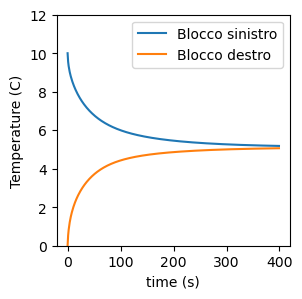

In [3]:
# Time axis
times = np.linspace(0, 1, 400)

# Initial condition
initial_condition = np.zeros(shape=(mesh.num_vertices))
x = mesh.vertices[:,0]
blocco_sinistro = x < x.mean()
blocco_destro = x >= x.mean()
initial_condition[blocco_sinistro] = 10

# Initialize the solver
solver = HeatEquation(mesh, times, diffusivity=1_000)

# Evaluate the solution
solution = solver.solve(initial_condition, mesh.get_boundary())

plt.figure(figsize=(3,3))
#plt.plot((solution @ mesh.get_mass_matrix('csc')).sum(axis=1))  <--- vera
plt.plot(solution[:,blocco_sinistro].mean(axis=1))
plt.plot(solution[:,blocco_destro].mean(axis=1))
plt.xlabel("time (s)")
plt.ylabel("Temperature (C)")
plt.ylim(0,12)
plt.legend(['Blocco sinistro','Blocco destro'])
plt.show()

In [4]:
animate_solution(solution, mesh, pause_time=0.05)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…